In [53]:
%reload_ext autoreload
%autoreload 2

##### Define ChEMBL and Papyrus versions

In [54]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [55]:
annotation_round = 2

##### Define output and distance directories

In [56]:
from utils import *
directories_file = './directories.json'

In [57]:
type_analysis_dir = get_mutant_analysis_path(directories_file, 'type', annotation_round)
type_analysis_dir_organism = os.path.join(type_analysis_dir, 'organism')
distance_dir = get_distance_path(directories_file)

In [58]:
# Create organism analysis directory if it does not exist
if not os.path.exists(type_analysis_dir_organism):
    os.makedirs(type_analysis_dir_organism)

##### Import analysis functions

In [59]:
# Import project path to allow for relative imports
import project_path

import os
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
from preprocessing import merge_chembl_papyrus_mutants
from mutant_analysis_type import plot_heatmap_aa_change,plot_bubble_aachange_distance,plot_stacked_bars_mutation_type
from mutant_analysis_family import obtain_chembl_family
from mutant_analysis_organism import annotate_organism_taxonomy

#### Mutation type analysis

In [61]:
# Read mutant annotated ChEMBL + Papyrus data
annotated_data = merge_chembl_papyrus_mutants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000, annotation_round)
annotated_data

target_id    connectivity  pchembl_value_Mean  \
0       A0A045ISB3_F161S  ALIJNJWQOZKBPP                5.07   
1       A0A045ISB3_F161S  CXXIUJZSLPZZIM                5.27   
2       A0A045ISB3_F161S  IPTNWUSXZLVWFT                5.04   
3       A0A045ISB3_F161S  LUVQLVJTOZVLDB                5.13   
4       A0A045ISB3_I203A  ALIJNJWQOZKBPP                7.37   
...                  ...             ...                 ...   
543038         Q9YQ12_WT  ZYLARFCKPNSSDA                6.17   
543039         Q9YQ12_WT  ZYLFWZWRSRMGBQ               10.10   
543040         Q9YQ12_WT  ZZCUJLFFPCGLAL                5.51   
543041         Q9YQ12_WT  ZZGMOZUZSAJAML                6.26   
543042         Q9YQ12_WT  ZZOKRSQSLSCEAE                7.52   

         Activity_class_consensus    source  \
0       Series([], dtype: object)  ChEMBL31   
1       Series([], dtype: object)  ChEMBL31   
2       Series([], dtype: object)  ChEMBL31   
3       Series([], dtype: object)  ChEMBL31   
4       Series([], dtype: object)  ChEMBL31   
...                           ...       ...   
543038  Series([], dtype: object)  ChEMBL31   
543039  Series([], dtype: object)  ChEMBL31   
543040  Series([], dtype: object)  ChEMBL31   
543041  Series([], dtype: object)  ChEMBL31   
543042  Series([], dtype: object)  ChEMBL31   

                                                   SMILES            CID  \
0             O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1  CHEMBL4637459   
1           O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1  CHEMBL4647367   
2            O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1  CHEMBL4638011   
3           O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1  CHEMBL4637373   
4             O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1  CHEMBL4637459   
...                                                   ...            ...   
543038  CC(C)[C@H](NC(=O)COc1ccccc1)C(=O)N[C@@H](Cc1cc...  CHEMBL3331342   
543039  Nc1cccc(CN2C(=O)N(Cc3ccc4cn[nH]c4c3)C(Cc3ccccc...  CHEMBL2296983   
543040  CC1(C)CC[C@]2(C(=O)NCCCCCC(=O)NCC(=O)O)CC[C@]3...  CHEMBL4530451   
543041  CC(C)c1nc(CN(C(=O)N[C@H](C(=O)N[C@H](CC[C@H](C...  CHEMBL3115161   
543042  CC1(C)CC(=O)C2=C(C1)Nc1ccccc1N(C(=O)C(=O)N1c3c...  CHEMBL2180490   

         accession                                           sequence    Year  \
0       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
1       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
2       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
3       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
4       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
...            ...                                                ...     ...   
543038      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2014.0   
543039      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2013.0   
543040      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2019.0   
543041      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2014.0   
543042      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2012.0   

               UniProtID                        Organism HGNC_symbol  
0       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN  
1       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN  
2       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN  
3       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN  
4       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN  
...                  ...                             ...         ...  
543038      Q9YQ12_9HIV1  Human immunodeficiency virus 1         NaN  
543039      Q9YQ12_9HIV1  Human immunodeficiency virus 1         NaN  
543040      Q9YQ12_9HIV1  Human immunodeficiency virus 1         NaN  
543041      Q9YQ12_9HIV1  Human immunodeficiency virus 1         NaN  
543042      Q9

In [62]:
# Plot heatmaps with amino acid change counts
plot_heatmap_aa_change(annotated_data, type_analysis_dir, 'variant', None, None)
plot_heatmap_aa_change(annotated_data, type_analysis_dir, 'activity', None, None)

#### Enrich annotated data with ChEMBL families and taxonomical classifications

In [63]:
# Get ChEMBL families to extract protein family accession codes
chembl_families = obtain_chembl_family(chembl_version).fillna('Other')
kinases_accession_list = chembl_families[chembl_families['l2']=='Kinase']['accession'].tolist()
gpcrs_accession_list = chembl_families[chembl_families['l2'].str.contains('G protein-coupled receptor')]['accession'].tolist()

In [64]:
# Annotate data for the taxonomical classification based on domain (i.e. Virus, Bacteria, Archaea, or Eukaryota)
annotated_data_tax = annotate_organism_taxonomy(annotated_data)
annotated_data_tax

Fetched: 306 / 335


target_id    connectivity  pchembl_value_Mean  \
0       A0A045ISB3_F161S  ALIJNJWQOZKBPP                5.07   
1       A0A045ISB3_F161S  CXXIUJZSLPZZIM                5.27   
2       A0A045ISB3_F161S  IPTNWUSXZLVWFT                5.04   
3       A0A045ISB3_F161S  LUVQLVJTOZVLDB                5.13   
4       A0A045ISB3_I203A  ALIJNJWQOZKBPP                7.37   
...                  ...             ...                 ...   
543038         Q9YQ12_WT  ZYLARFCKPNSSDA                6.17   
543039         Q9YQ12_WT  ZYLFWZWRSRMGBQ               10.10   
543040         Q9YQ12_WT  ZZCUJLFFPCGLAL                5.51   
543041         Q9YQ12_WT  ZZGMOZUZSAJAML                6.26   
543042         Q9YQ12_WT  ZZOKRSQSLSCEAE                7.52   

         Activity_class_consensus    source  \
0       Series([], dtype: object)  ChEMBL31   
1       Series([], dtype: object)  ChEMBL31   
2       Series([], dtype: object)  ChEMBL31   
3       Series([], dtype: object)  ChEMBL31   
4       Series([], dtype: object)  ChEMBL31   
...                           ...       ...   
543038  Series([], dtype: object)  ChEMBL31   
543039  Series([], dtype: object)  ChEMBL31   
543040  Series([], dtype: object)  ChEMBL31   
543041  Series([], dtype: object)  ChEMBL31   
543042  Series([], dtype: object)  ChEMBL31   

                                                   SMILES            CID  \
0             O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1  CHEMBL4637459   
1           O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1  CHEMBL4647367   
2            O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1  CHEMBL4638011   
3           O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1  CHEMBL4637373   
4             O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1  CHEMBL4637459   
...                                                   ...            ...   
543038  CC(C)[C@H](NC(=O)COc1ccccc1)C(=O)N[C@@H](Cc1cc...  CHEMBL3331342   
543039  Nc1cccc(CN2C(=O)N(Cc3ccc4cn[nH]c4c3)C(Cc3ccccc...  CHEMBL2296983   
543040  CC1(C)CC[C@]2(C(=O)NCCCCCC(=O)NCC(=O)O)CC[C@]3...  CHEMBL4530451   
543041  CC(C)c1nc(CN(C(=O)N[C@H](C(=O)N[C@H](CC[C@H](C...  CHEMBL3115161   
543042  CC1(C)CC(=O)C2=C(C1)Nc1ccccc1N(C(=O)C(=O)N1c3c...  CHEMBL2180490   

         accession                                           sequence    Year  \
0       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
1       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
2       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
3       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
4       A0A045ISB3  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...  2020.0   
...            ...                                                ...     ...   
543038      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2014.0   
543039      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2013.0   
543040      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2019.0   
543041      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2014.0   
543042      Q9YQ12  PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...  2012.0   

               UniProtID                        Organism HGNC_symbol  \
0       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN   
1       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN   
2       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN   
3       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN   
4       A0A045ISB3_MYCTX      Mycobacterium tuberculosis         NaN   
...                  ...                             ...         ...   
543038      Q9YQ12_9HIV1  Human immunodeficiency virus 1         NaN   
543039      Q9YQ12_9HIV1  Human immunodeficiency virus 1         NaN   
543040      Q9YQ12_9HIV1  Human immunodeficiency virus 1         NaN   
543041      Q9YQ12_9HIV1  Human immunodeficiency virus 1         NaN   
543

##### Statistics per taxonomical groups

In [65]:
# Count organisms
annotated_data_tax.groupby(['classification'])['Organism'].nunique()

classification
Archaea       1
Bacteria     17
Eukaryota    14
Virus        14
Name: Organism, dtype: int64

In [66]:
# Count proteins
annotated_data_tax.groupby(['classification'])['accession'].nunique()

classification
Archaea        1
Bacteria      28
Eukaryota    275
Virus         28
Name: accession, dtype: int64

In [67]:
# Count proteins in most populated organism from each domain
annotated_data_tax[annotated_data_tax['Organism'].isin(['Homo sapiens (Human)','Human immunodeficiency virus 1',
                                                        'Escherichia coli (strain K12)'])].groupby(['Organism'])['accession'].nunique()

Organism
Escherichia coli (strain K12)       7
Homo sapiens (Human)              235
Human immunodeficiency virus 1      5
Name: accession, dtype: int64

In [68]:
# Count variants
annotated_data_tax.groupby(['classification'])['target_id'].nunique()

classification
Archaea         2
Bacteria      115
Eukaryota    1410
Virus         217
Name: target_id, dtype: int64

In [69]:
# Count variants in most populated organism from each domain
annotated_data_tax[annotated_data_tax['Organism'].isin(['Homo sapiens (Human)','Human immunodeficiency virus 1','Escherichia coli (strain K12)'])].groupby(['Organism'])['target_id'].nunique()

Organism
Escherichia coli (strain K12)       22
Homo sapiens (Human)              1225
Human immunodeficiency virus 1     119
Name: target_id, dtype: int64

In [70]:
# Count bioactivity data
annotated_data_tax.groupby(['classification'])['pchembl_value_Mean'].count()

classification
Archaea           2
Bacteria       3203
Eukaryota    517203
Virus         21972
Name: pchembl_value_Mean, dtype: int64

In [71]:
# Count bioactivity data in most populated organism from each domain
annotated_data_tax[annotated_data_tax['Organism'].isin(['Homo sapiens (Human)','Human immunodeficiency virus 1','Escherichia coli (strain K12)'])].groupby(['Organism'])['pchembl_value_Mean'].count()

Organism
Escherichia coli (strain K12)       1338
Homo sapiens (Human)              500002
Human immunodeficiency virus 1     15512
Name: pchembl_value_Mean, dtype: int64

In [72]:
# Check how many bioactivity datapoints are there per organism (with taxonomical annotation)
annotated_data_tax.groupby(['classification','Organism'])['pchembl_value_Mean'].count().reset_index()

classification                                           Organism  \
0         Archaea  Pyrococcus horikoshii (strain ATCC 700860 / DS...   
1        Bacteria                                 Bacillus anthracis   
2        Bacteria                     Bacillus subtilis (strain 168)   
3        Bacteria  Bacteroides thetaiotaomicron (strain ATCC 2914...   
4        Bacteria                      Escherichia coli (strain K12)   
5        Bacteria  Escherichia coli O127:H6 (strain E2348/69 / EPEC)   
6        Bacteria  Francisella tularensis subsp. tularensis (stra...   
7        Bacteria  Lactococcus lactis subsp. cremoris (strain MG1...   
8        Bacteria                   Magnetospirillum gryphiswaldense   
9        Bacteria                         Mycobacterium tuberculosis   
10       Bacteria  Mycobacterium tuberculosis (strain ATCC 25618 ...   
11       Bacteria  Mycobacterium tuberculosis (strain CDC 1551 / ...   
12       Bacteria  Rhizobium leguminosarum bv. trifolii (strain W...   
13       Bacteria                              Staphylococcus aureus   
14       Bacteria                 Staphylococcus aureus (strain MW2)   
15       Bacteria       Synechocystis sp. (strain PCC 6803 / Kazusa)   
16       Bacteria  Thermus thermophilus (strain ATCC 27634 / DSM ...   
17       Bacteria  Vibrio cholerae serotype O1 (strain ATCC 39315...   
18      Eukaryota       Anopheles gambiae (African malaria mosquito)   
19      Eukaryota             Arabidopsis thaliana (Mouse-ear cress)   
20      Eukaryota                                Bos taurus (Bovine)   
21      Eukaryota  Chlamydomonas reinhardtii (Chlamydomonas smithii)   
22      Eukaryota                              Crithidia fasciculata   
23      Eukaryota                            Gallus gallus (Chicken)   
24      Eukaryota                               Homo sapiens (Human)   
25      Eukaryota                                   Leishmania major   
26      Eukaryota  Magnaporthe oryzae (strain 70-15 / ATCC MYA-46...   
27      Eukaryota                               Mus musculus (Mouse)   
28      Eukaryota                Plasmodium falciparum (isolate 3D7)   
29      Eukaryota      Plasmodium falciparum (isolate K1 / Thailand)   
30      Eukaryota                               Pneumocystis carinii   
31      Eukaryota                            Rattus norvegicus (Rat)   
32          Virus         Enterobacteria phage T4 (Bacteriophage T4)   
33          Virus                                      Hepacivirus C   
34          Virus                            Hepatitis B virus (HBV)   
35          Virus                       Hepatitis C virus subtype 1b   
36          Virus                     Human immunodeficiency virus 1   
37          Virus  Human immunodeficiency virus type 1 group M su...   
38          Virus                  Human respiratory syncytial virus   
39          Virus    Human respiratory syncytial virus A (strain A2)   
40          Virus       Influenza A virus (A/Brisbane/59/2007(H1N1))   
41          Virus  Influenza A virus (strain A/Puerto Rico/8/1934...   
42          Virus       Influenza A virus (strain A/Udorn/1972 H3N2)   
43          Virus  Influenza A virus (strain A/Wilson-Smith/1933 ...   
44          Virus              Influenza B virus (strain B/Lee/1940)   
45          Virus  Zaire ebolavirus (strain Mayinga-76) (ZEBOV) (...   

    pchembl_value_Mean  
0                    2  
1                   67  
2                    4  
3                   28  
4                 1338  
5                    7  
6                   26  
7                   23  
8                   25  
9                  261  
10                 640  
11                  50  
12                   4  
13                 624  
14                  40  
15                  31  
16                   5  
17                  30  
18                  80  
19                  60  
20                 187  
21                  61  
22                  16  
23                

In [73]:
# Check how many bioactivity datapoints are there per organism and variant (with taxonomical annotation)
annotated_data_tax.groupby(['classification','Organism','target_id'])['pchembl_value_Mean'].count()

classification  Organism                                                                                target_id   
Archaea         Pyrococcus horikoshii (strain ATCC 700860 / DSM 12428 / JCM 9974 / NBRC 100139 / OT-3)  O59010_D405N      1
                                                                                                        O59010_L130W      1
Bacteria        Bacillus anthracis                                                                      Q81R22_F96I      18
                                                                                                        Q81R22_WT        31
                                                                                                        Q81R22_Y102F     18
                                                                                                                       ... 
Virus           Influenza B virus (strain B/Lee/1940)                                                   P03474_WT       182
               

#### Plot mutation type statistics taking into account taxonomical classifications and organisms

##### Accumulated number of variants with individual amino acid changes

###### Homo sapiens

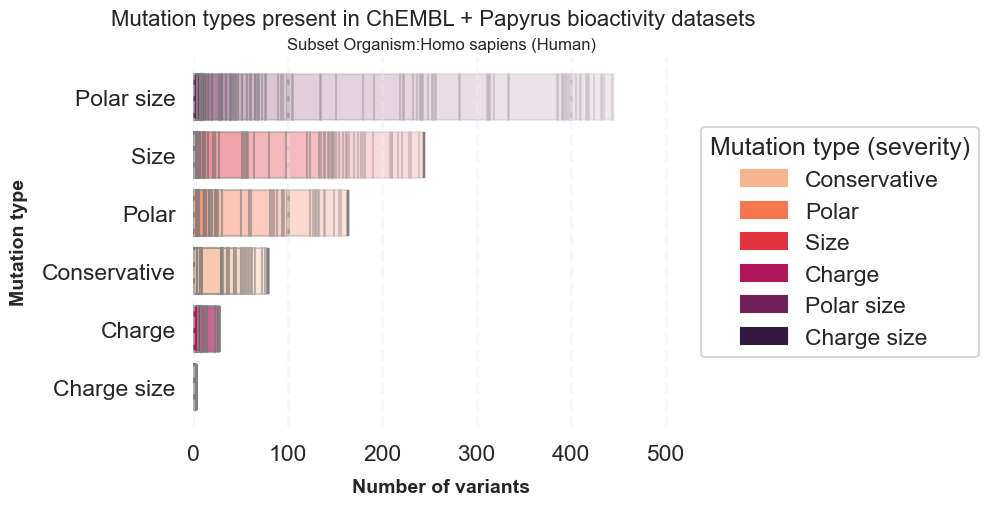

In [74]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'mutation_type', 'Organism', 'Homo sapiens (Human)', False)

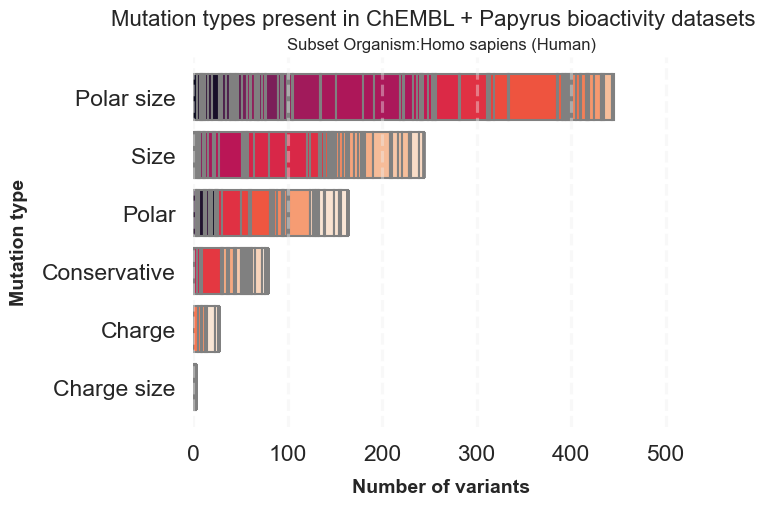

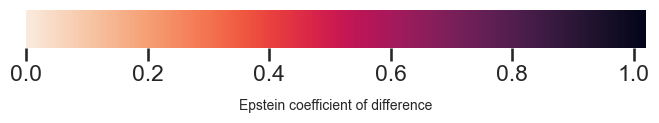

In [75]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'distance_matrix', 'Organism', 'Homo sapiens (Human)', False)

###### Bacteria

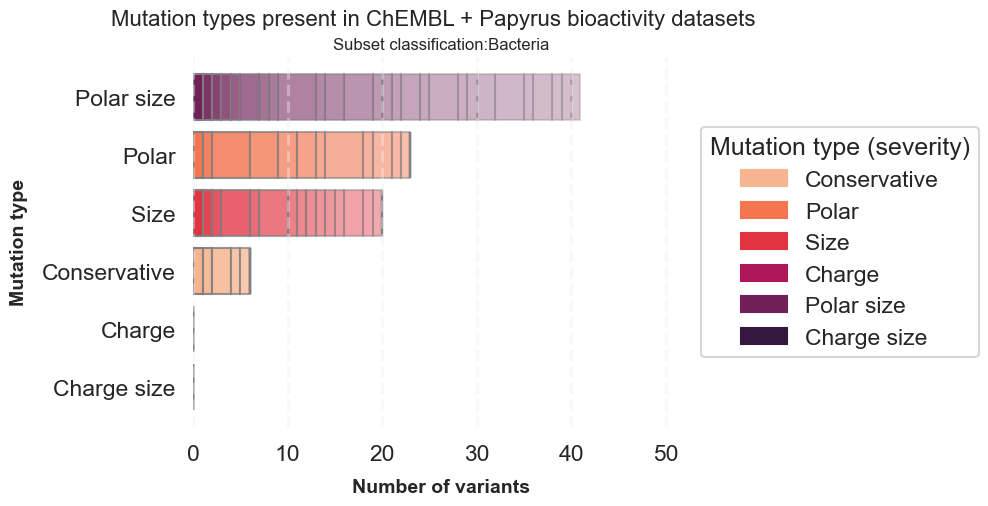

In [76]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'mutation_type', 'classification', 'Bacteria', False)

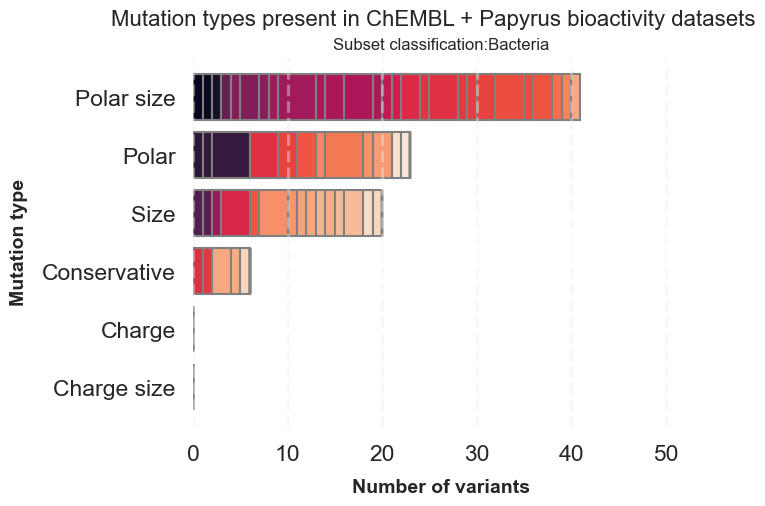

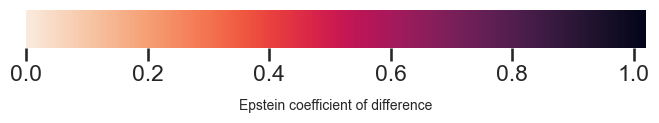

In [77]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'distance_matrix', 'classification', 'Bacteria', False)

###### Virus

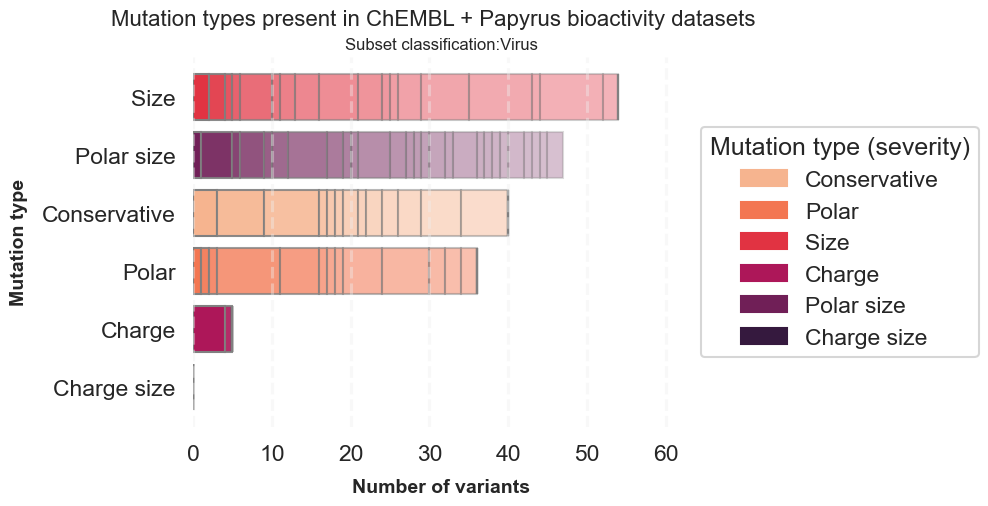

In [78]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'mutation_type', 'classification', 'Virus', False)

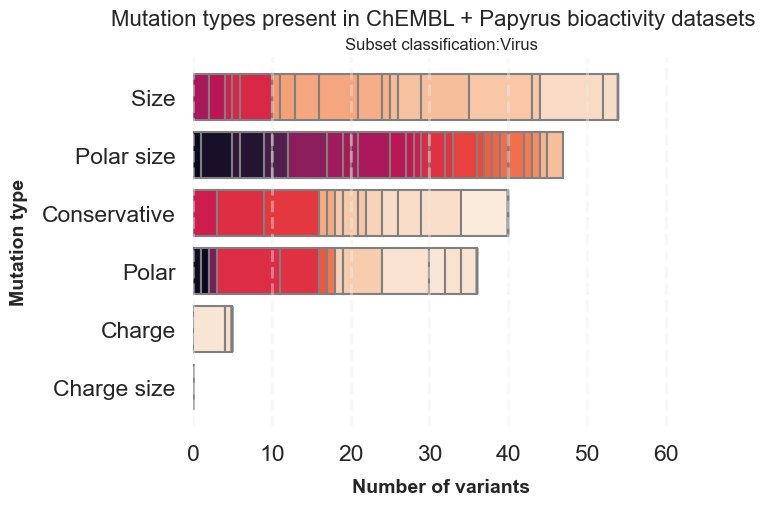

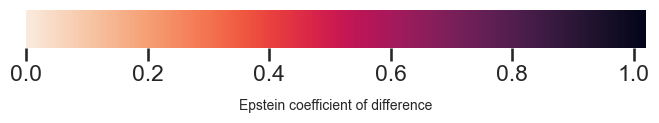

In [79]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'distance_matrix', 'classification', 'Virus', False)

##### Correlation between position of mutation and how disruptive it is

Fetched: 7 / 7
Reading pre-computed results...
{'P51817_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'P53667_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'3BLR': {'ligand': 'CPB', 'chain': 'A', 'distance': {'7': 33.57, '8': 31.408, '9': 32.207, '10': 26.973, '11': 27.683, '12': 25.775, '13': 22.093, '14': 21.555, '15': 22.562, '16': 17.256, '17': 20.622, '18': 19.383, '19': 15.925, '20': 18.284, '21': 14.884, '22': 14.724, '23': 11.937, '24': 11.263, '25': 7.111, '26': 7.285, '27': 11.05, '28': 10.985, '29': 12.739, '30': 7.749, '31': 9.776, '32': 10.786, '33': 5.955, '34': 10.204, '35': 10.556, '36': 12.425, '37': 17.936, '38': 19.036, '39': 21.214, '40': 24.394, '41': 21.109, '42': 18.522, '43': 15.991, '44': 13.748, '45': 10.865, '46': 7.459, '47': 9.901, '48': 7.535, '49': 13.028, '50': 14.137, '51': 14.395, '52': 19.07, '53': 18.897, '54': 23.431, '55': 21.985, '56': 27.107, '57': 27.02, '58': 24.291, '59'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



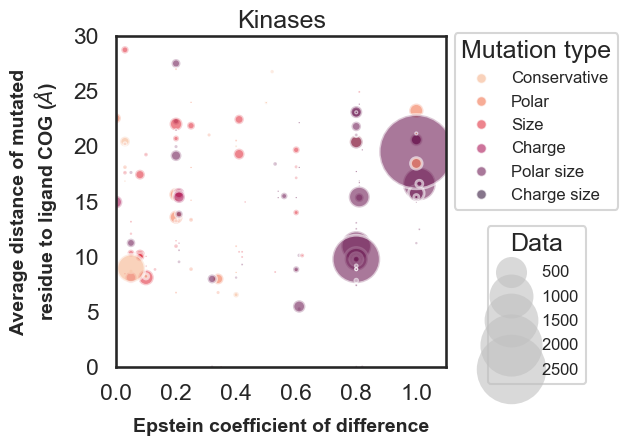

In [80]:
plot_bubble_aachange_distance(annotated_data, kinases_accession_list, 'Kinases', distance_dir,
                              type_analysis_dir, True,True)

Fetched: 2 / 2
Reading pre-computed results...
{'Q8HZ64_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'P51675_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'P33535_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'P30994_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'Q9R297_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'P35400_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'Q923Y9_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'P48145_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'P35349_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'Q8TDS5_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'P52702_average': {'n_structures': 0, 'dis

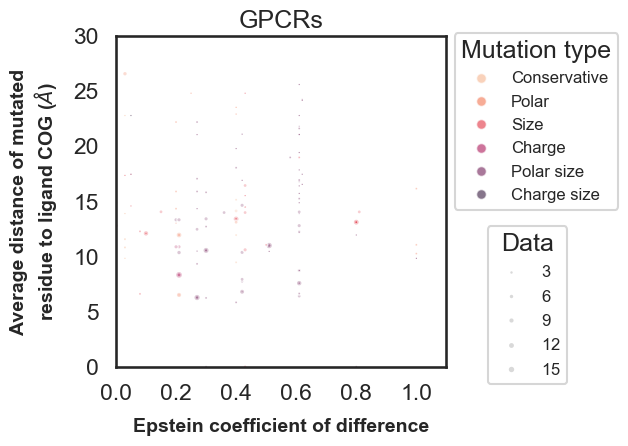

In [81]:
plot_bubble_aachange_distance(annotated_data, gpcrs_accession_list[:872], 'GPCRs', distance_dir,
                              type_analysis_dir, True,True)

Reading pre-computed results...
{'1M17': {'ligand': 'AQ4', 'chain': 'A', 'distance': {'672': 36.457, '673': 32.553, '674': 31.168, '675': 30.997, '676': 25.817, '677': 28.573, '678': 23.664, '679': 23.341, '680': 20.822, '681': 20.4, '682': 21.338, '683': 18.391, '684': 22.415, '685': 19.368, '686': 22.128, '687': 20.424, '688': 15.927, '689': 17.796, '690': 13.992, '691': 13.838, '692': 11.135, '693': 10.063, '694': 5.868, '695': 7.906, '696': 11.385, '697': 11.827, '698': 14.183, '699': 10.899, '700': 11.837, '701': 10.164, '702': 5.894, '703': 9.876, '704': 9.019, '705': 11.135, '706': 14.7, '707': 16.522, '708': 19.752, '709': 21.349, '710': 26.402, '711': 26.939, '712': 25.237, '713': 25.421, '714': 21.252, '715': 19.02, '716': 15.227, '717': 12.093, '718': 9.853, '719': 6.812, '720': 9.24, '721': 8.587, '722': 12.721, '723': 14.964, '724': 17.822, '725': 20.588, '726': 21.614, '727': 22.86, '728': 21.695, '729': 24.291, '730': 22.573, '731': 18.906, '732': 20.305, '733': 22.088, 

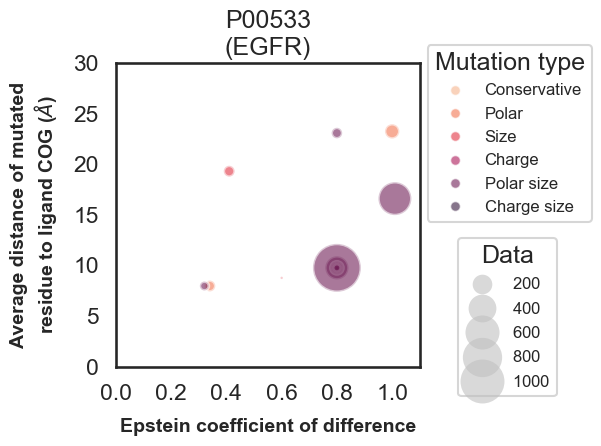

In [82]:
plot_bubble_aachange_distance(annotated_data, ['P00533'], 'EGFR', distance_dir,
                              type_analysis_dir, True,True)

Reading pre-computed results...
{'1OPL': {'ligand': 'P16', 'chain': 'A', 'distance': {'81': 44.657, '82': 44.699, '83': 40.053, '84': 39.723, '85': 35.393, '86': 34.088, '87': 31.012, '88': 28.912, '89': 25.03, '90': 25.912, '91': 24.125, '92': 23.862, '93': 25.497, '94': 23.406, '95': 24.745, '96': 28.834, '97': 28.227, '98': 26.629, '99': 29.834, '100': 28.787, '101': 28.912, '102': 30.854, '103': 29.99, '104': 34.117, '105': 34.29, '106': 38.579, '107': 34.916, '108': 39.86, '109': 35.783, '110': 37.32, '111': 34.244, '112': 32.241, '113': 28.428, '114': 27.539, '115': 26.218, '116': 27.977, '117': 23.853, '118': 24.467, '119': 29.919, '120': 33.495, '121': 33.645, '122': 37.805, '123': 36.202, '124': 40.333, '125': 36.151, '126': 36.037, '127': 35.717, '128': 31.492, '129': 29.121, '130': 27.407, '131': 24.53, '132': 27.246, '133': 24.595, '134': 23.85, '135': 29.877, '136': 32.813, '137': 35.801, '138': 38.935, '139': 40.042, '140': 36.795, '141': 36.704, '142': 32.619, '143': 36.

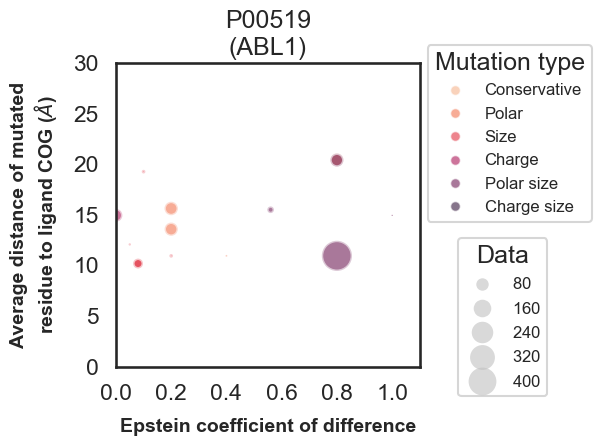

In [83]:
plot_bubble_aachange_distance(annotated_data, ['P00519'], 'ABL1', distance_dir,
                              type_analysis_dir, True,True)

Failed to map 2 ID(s).
Fetched: 26 / 28
Reading pre-computed results...
{'A3EZI9_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'A3EZJ3_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'B4URF0_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'C1KIQ2_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'D2K2A8_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'D5F1R0_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'K7XJL6_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'181L': {'ligand': 'BNZ', 'chain': 'A', 'distance': {'1': 18.488, '2': 17.233, '3': 13.341, '4': 17.138, '5': 19.636, '6': 14.472, '7': 14.768, '8': 21.565, '9': 19.531, '10': 16.546, '11': 17.955, '12': 21.806, '13': 25.407, '14': 27.014, '15': 29.684, '16': 31.714, '17': 29.346, '18': 25

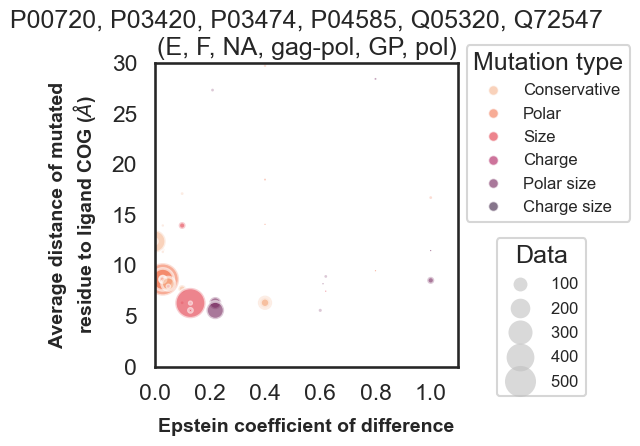

In [84]:
# Get all proteins from virus
virus_accession_list = annotated_data_tax[annotated_data_tax['classification']=='Virus'].accession.unique()\
    .tolist()
plot_bubble_aachange_distance(annotated_data, virus_accession_list, 'Virus', distance_dir,
                              type_analysis_dir_organism, True, True)

Fetched: 5 / 5
Reading pre-computed results...
{'2JLE': {'ligand': 'I15', 'chain': 'A', 'distance': {'1': 26.398, '2': 28.465, '3': 26.002, '4': 28.065, '5': 26.236, '6': 29.256, '7': 30.737, '8': 29.01, '9': 32.306, '10': 32.799, '11': 36.357, '12': 38.087, '13': 37.371, '14': 40.962, '15': 43.979, '16': 42.02, '17': 43.644, '18': 42.048, '19': 41.058, '20': 45.518, '21': 43.31, '22': 47.229, '23': 44.424, '24': 44.472, '25': 47.968, '26': 44.793, '27': 45.915, '28': 49.063, '29': 44.011, '30': 41.852, '31': 44.53, '32': 44.027, '33': 39.684, '34': 39.172, '35': 41.748, '36': 38.819, '37': 35.521, '38': 37.551, '39': 39.208, '40': 34.828, '41': 33.383, '42': 38.377, '43': 36.549, '44': 32.184, '45': 33.649, '46': 30.877, '47': 35.561, '48': 38.856, '49': 43.24, '50': 44.053, '51': 47.373, '52': 50.287, '53': 50.23, '54': 45.101, '55': 46.765, '56': 43.474, '57': 42.485, '58': 38.736, '59': 39.415, '60': 38.763, '61': 38.014, '62': 37.221, '63': 35.001, '64': 36.339, '65': 35.639, '66'

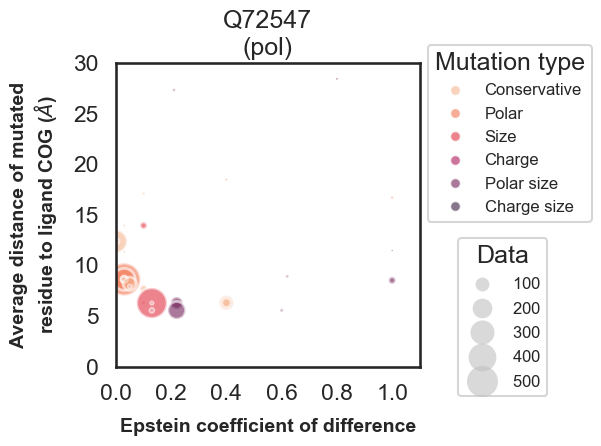

In [85]:
# Get proteins in HIV
hiv_accession_list = annotated_data[annotated_data['Organism'].str.contains('Human immunodeficiency virus 1', na=False)
]['accession'].unique().tolist()
plot_bubble_aachange_distance(annotated_data, hiv_accession_list, 'HIV', distance_dir,
                              type_analysis_dir_organism, True, True)

Fetched: 28 / 28
Reading pre-computed results...
{'A0A045ISB3_average': {'n_structures': 0, 'distance': {}}}
{}
Reading pre-computed results...
{'4POP': {'ligand': '2VY', 'chain': 'A', 'distance': {'6': 37.93, '7': 34.506, '8': 34.907, '9': 33.807, '10': 29.957, '11': 29.599, '12': 29.807, '13': 28.345, '14': 24.831, '15': 24.705, '16': 25.56, '17': 22.466, '18': 19.712, '19': 20.875, '20': 20.927, '21': 16.753, '22': 16.956, '23': 19.663, '24': 17.305, '25': 13.757, '26': 16.62, '27': 16.71, '28': 15.655, '29': 11.517, '30': 11.67, '31': 13.067, '32': 12.887, '33': 9.327, '34': 4.439, '35': 9.07, '36': 7.998, '37': 12.174, '38': 10.014, '39': 15.116, '40': 14.142, '41': 14.07, '42': 18.04, '43': 19.286, '44': 17.922, '45': 18.704, '46': 23.511, '47': 23.155, '48': 22.489, '49': 24.43, '50': 28.778, '51': 29.016, '52': 25.65, '53': 23.86, '54': 25.25, '55': 24.081, '56': 20.807, '57': 20.186, '58': 21.779, '59': 19.283, '60': 16.403, '61': 17.896, '62': 19.554, '63': 13.812, '64': 13.9

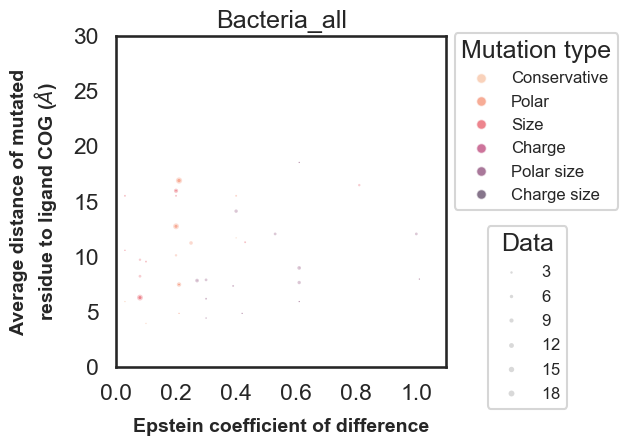

In [86]:
# Get all proteins from bacteria
bacteria_accession_list = annotated_data_tax[annotated_data_tax['classification']=='Bacteria'].accession.unique()\
    .tolist()
plot_bubble_aachange_distance(annotated_data, bacteria_accession_list, 'Bacteria_all', distance_dir,
                              type_analysis_dir_organism, True, True)

Fetched: 7 / 7
Reading pre-computed results...
{'3IIQ': {'ligand': 'JZA', 'chain': 'A', 'distance': {'79': 26.428, '80': 26.333, '81': 24.947, '82': 19.273, '83': 18.655, '84': 14.409, '85': 12.303, '86': 9.773, '87': 6.989, '88': 4.903, '89': 6.523, '90': 6.295, '91': 10.143, '92': 10.971, '93': 14.839, '94': 14.843, '95': 12.244, '96': 12.804, '97': 10.089, '98': 13.407, '99': 14.081, '100': 16.14, '101': 15.579, '102': 20.166, '103': 18.726, '104': 22.965, '105': 22.303, '106': 22.548, '124': 26.259, '125': 22.366, '126': 24.561, '127': 23.831, '128': 19.702, '129': 19.76, '130': 15.81, '131': 15.301, '132': 14.055, '133': 12.716, '134': 15.049, '135': 10.779, '136': 14.654, '137': 13.971, '138': 12.976, '139': 15.627, '140': 14.874, '141': 10.405, '142': 11.582, '143': 7.744, '144': 9.731, '145': 9.856, '146': 15.447, '147': 17.71, '148': 18.637, '149': 20.55, '150': 23.658, '151': 25.648, '152': 27.573, '153': 25.395, '154': 27.301, '155': 22.402, '156': 23.712, '157': 18.9, '158'

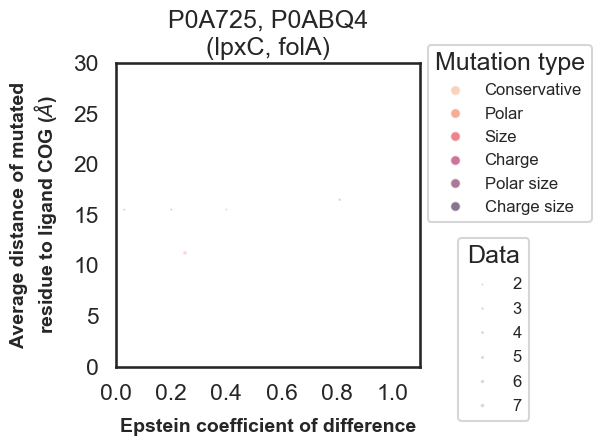

In [87]:
# Get all proteins from E.coli
ecoli_accession_list = annotated_data[annotated_data['Organism'] == 'Escherichia coli (strain K12)']['accession']\
    .unique().tolist()
plot_bubble_aachange_distance(annotated_data, ecoli_accession_list, 'EColi_All', distance_dir,
                              type_analysis_dir_organism, True, True)